In [1]:
import pandas as pd
import numpy as np

import os
import sys

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [2]:
Emotions = pd.read_csv('emotion.csv')
Emotions.head()

,0,1,2,3,4,5,6,7,8,9,...,2367,2368,2369,2370,2371,2372,2373,2374,2375,Emotions
0,0.173828,0.264648,0.372559,0.486328,0.625488,0.681152,0.720703,0.651855,0.562988,0.559082,...,27.454710,-24.811575,38.476006,-20.518929,26.791615,-20.561426,16.872976,-15.906387,12.373283,neutral
1,0.251953,0.378418,0.492676,0.497070,0.501953,0.503418,0.500977,0.498047,0.490234,0.494629,...,0.873289,0.464743,6.040663,-1.618928,-0.346345,2.412566,-4.389700,-2.114351,8.887232,neutral
2,0.256348,0.354492,0.471191,0.414062,0.378418,0.373535,0.354492,0.408691,0.466797,0.522461,...,26.907248,-9.886968,33.736134,-5.981696,18.949165,-15.546387,16.316257,-17.477917,18.818737,neutral
3,0.254883,0.373535,0.499023,0.505371,0.503906,0.505371,0.502930,0.496582,0.499512,0.509277,...,2.224589,-0.678352,2.208240,1.466299,2.025446,2.246046,-2.888292,3.860585,1.290843,neutral
4,0.247070,0.389648,0.564941,0.642578,0.665527,0.684570,0.676270,0.666992,0.648926,0.595703,...,23.018936,-22.310469,22.215027,-20.285820,21.415392,-16.627449,20.846609,-14.373590,15.843704,neutral


In [3]:
print(Emotions.isna().any())

0           False
1           False
2           False
3           False
4           False
            ...  
2372         True
2373         True
2374         True
2375         True
Emotions    False
Length: 2377, dtype: bool


In [4]:
Emotions=Emotions.fillna(0)
print(Emotions.isna().any())
Emotions.shape

0           False
1           False
2           False
3           False
4           False
            ...  
2372        False
2373        False
2374        False
2375        False
Emotions    False
Length: 2377, dtype: bool


(35856, 2377)

In [5]:
np.sum(Emotions.isna())

C:\Users\abina\miniconda3\envs\test\lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


0           0
1           0
2           0
3           0
4           0
           ..
2372        0
2373        0
2374        0
2375        0
Emotions    0
Length: 2377, dtype: int64

In [6]:
X = Emotions.iloc[: ,:-1].values
Y = Emotions['Emotions'].values

In [7]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()


In [8]:
print(Y.shape)
X.shape

(35856, 4)


(35856, 2376)

In [9]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=42,test_size=0.2, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((28684, 2376), (28684, 4), (7172, 2376), (7172, 4))

In [10]:
#reshape for lstm
X_train = x_train.reshape(x_train.shape[0] , x_train.shape[1] , 1)
X_test = x_test.reshape(x_test.shape[0] , x_test.shape[1] , 1)

In [11]:
X_train.shape[1]

2376

In [12]:
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((28684, 2376), (28684, 4), (7172, 2376), (7172, 4))

In [13]:
from keras.callbacks import ModelCheckpoint, EarlyStopping,ReduceLROnPlateau
model_checkpoint = ModelCheckpoint('best_model1_weights.h5', monitor='val_accuracy', save_best_only=True)

In [14]:
early_stop=EarlyStopping(monitor='val_acc',mode='auto',patience=5,restore_best_weights=True)
lr_reduction=ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.5,min_lr=0.00001)

In [15]:
import tensorflow as tf
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM,BatchNormalization , GRU
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import SGD

In [16]:
#Reshape for CNN_LSTM MODEL

x_traincnn =np.expand_dims(x_train, axis=2)
x_testcnn= np.expand_dims(x_test, axis=2)
x_traincnn.shape, y_train.shape, x_testcnn.shape, y_test.shape
#x_testcnn[0]

((28684, 2376, 1), (28684, 4), (7172, 2376, 1), (7172, 4))

In [17]:
import tensorflow.keras.layers as L

model = tf.keras.Sequential([
    L.Conv1D(16,kernel_size=5, strides=1,padding='same', activation='relu',input_shape=(X_train.shape[1],1)),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    
    L.Conv1D(32,kernel_size=5,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    Dropout(0.2),  # Add dropout layer after the second max pooling layer
    
    L.Conv1D(64,kernel_size=3,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    
    L.Conv1D(128,kernel_size=3,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=3,strides=2,padding='same'),
    Dropout(0.2),  # Add dropout layer after the fifth max pooling layer

    L.Conv1D(128,kernel_size=3,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=8,strides=2,padding='same'),
    #Dropout(0.2),  # Add dropout layer after the fourth max pooling layer
    
    L.Flatten(),
    L.Dense(64,activation='relu'),
    L.BatchNormalization(),
    L.Dense(4,activation='softmax')
])
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 2376, 16)          96        
                                                                 
 batch_normalization (BatchN  (None, 2376, 16)         64        
 ormalization)                                                   
                                                                 
 max_pooling1d (MaxPooling1D  (None, 1188, 16)         0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 1188, 32)          2592      
                                                                 
 batch_normalization_1 (Batc  (None, 1188, 32)         128       
 hNormalization)                                                 
                                                        

In [18]:
history=model.fit(x_traincnn, y_train, epochs=15, validation_data=(x_testcnn, y_test), batch_size=64,callbacks=[early_stop,lr_reduction,model_checkpoint])

Epoch 1/15
449/449 [==============================] - 19s 26ms/step - loss: 0.8260 - accuracy: 0.6441 - val_loss: 1.0312 - val_accuracy: 0.6729 - lr: 0.0010
Epoch 2/15
449/449 [==============================] - 13s 28ms/step - loss: 0.6580 - accuracy: 0.7224 - val_loss: 0.9526 - val_accuracy: 0.6853 - lr: 0.0010
Epoch 3/15
449/449 [==============================] - 13s 29ms/step - loss: 0.6044 - accuracy: 0.7419 - val_loss: 0.6229 - val_accuracy: 0.7427 - lr: 0.0010
Epoch 4/15
449/449 [==============================] - 13s 28ms/step - loss: 0.5695 - accuracy: 0.7571 - val_loss: 0.6945 - val_accuracy: 0.7408 - lr: 0.0010
Epoch 5/15
449/449 [==============================] - 13s 29ms/step - loss: 0.5379 - accuracy: 0.7741 - val_loss: 0.5774 - val_accuracy: 0.7605 - lr: 0.0010
Epoch 6/15
449/449 [==============================] - 13s 29ms/step - loss: 0.5191 - accuracy: 0.7853 - val_loss: 0.7457 - val_accuracy: 0.7546 - lr: 0.0010
Epoch 7/15
449/449 [==============================] - 13s 

225/225 [==============================] - 1s 6ms/step - loss: 0.4459 - accuracy: 0.8282
Accuracy of our model on test data :  82.82208442687988 %


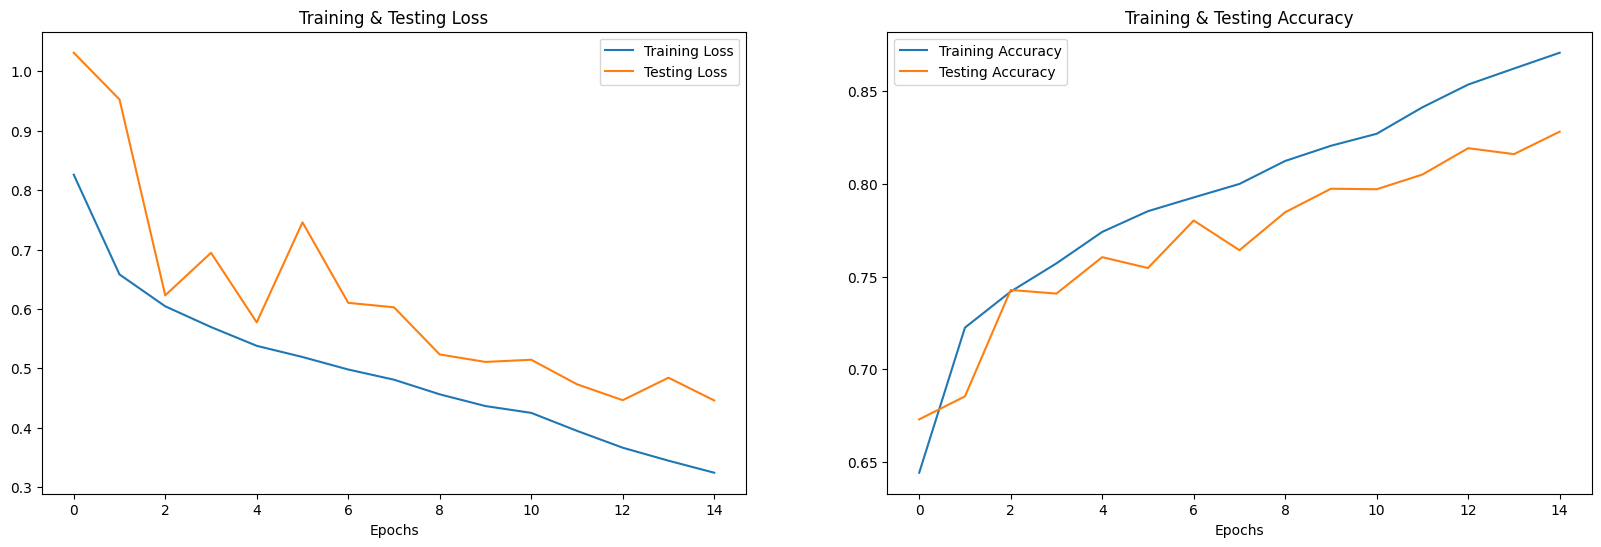

In [19]:
print("Accuracy of our model on test data : " , model.evaluate(x_testcnn,y_test)[1]*100 , "%")

epochs = [i for i in range(15)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [20]:
pred_test0 = model.predict(x_testcnn)
y_pred0 = encoder.inverse_transform(pred_test0)
y_test0 = encoder.inverse_transform(y_test)

# Check for random predictions
df0 = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df0['Predicted Labels'] = y_pred0.flatten()
df0['Actual Labels'] = y_test0.flatten()

df0.head(10)

225/225 [==============================] - 1s 4ms/step


,Predicted Labels,Actual Labels
0,neutral,neutral
1,happy,happy
2,neutral,neutral
3,neutral,neutral
4,sad,neutral
5,happy,happy
6,angry,angry
7,happy,happy
8,angry,angry
9,angry,angry


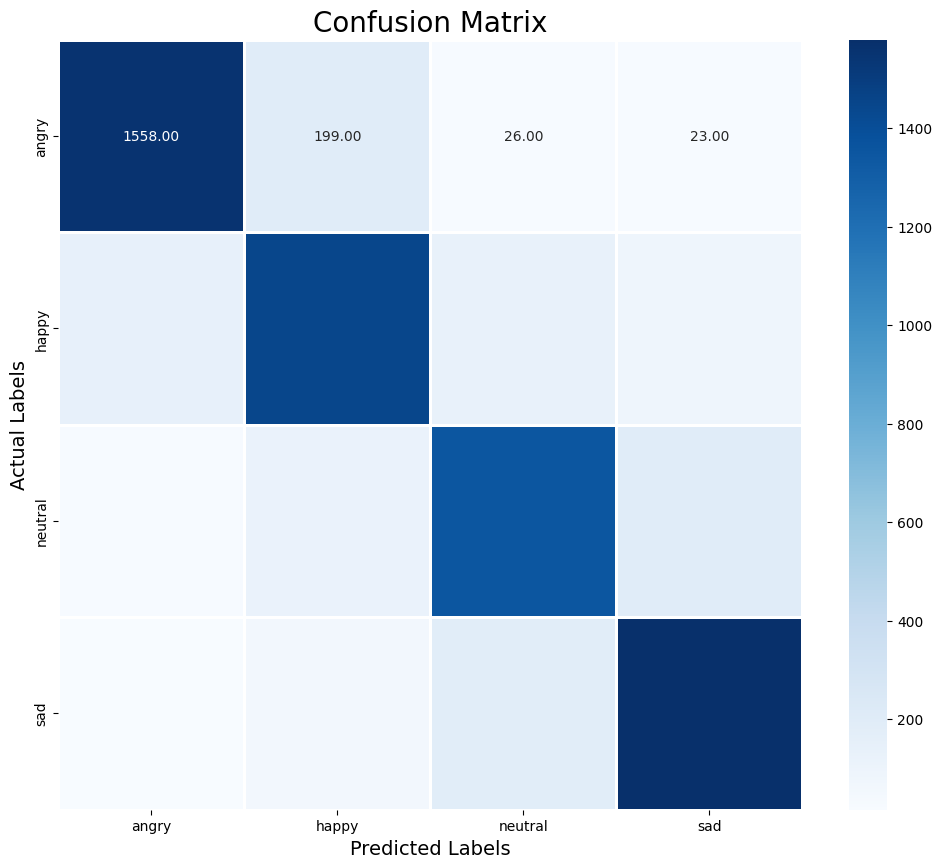

              precision    recall  f1-score   support

       angry       0.89      0.86      0.88      1806
       happy       0.79      0.80      0.79      1818
     neutral       0.79      0.80      0.79      1699
         sad       0.84      0.85      0.85      1849

    accuracy                           0.83      7172
   macro avg       0.83      0.83      0.83      7172
weighted avg       0.83      0.83      0.83      7172



In [21]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test0, y_pred0)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
#cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='.2f')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()
print(classification_report(y_test0, y_pred0))

In [22]:
# MLP for Pima Indians Dataset Serialize to JSON and HDF5
from tensorflow.keras.models import Sequential, model_from_json
model_json = model.to_json()
with open("CNN_model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("CNN_model_weights.h5")
print("Saved model to disk") 

Saved model to disk


In [23]:
from tensorflow.keras.models import Sequential, model_from_json
import numpy as np
json_file = open('CNN_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("best_model1_weights.h5")
print("Loaded model from disk")

Loaded model from disk


In [24]:
import pickle

# Saving scaler
with open('scaler2.pickle', 'wb') as f:
    pickle.dump(scaler, f)

# Loading scaler
with open('scaler2.pickle', 'rb') as f:
    scaler2 = pickle.load(f)

# Saving encoder
with open('encoder2.pickle', 'wb') as f:
    pickle.dump(encoder, f)

# Loading encoder
with open('encoder2.pickle', 'rb') as f:
    encoder2 = pickle.load(f)

    
print("Done") 

Done
